In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import RMSprop, Adagrad

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/02_combi_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Combine all optimal hyperparameters

In [7]:
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#First Dense Layer
x = Dense(600, activation='relu')(embedded_sequences)

x = Flatten()(x)

#Output (Dense) Layer
preds = Dense(2, activation='hard_sigmoid')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


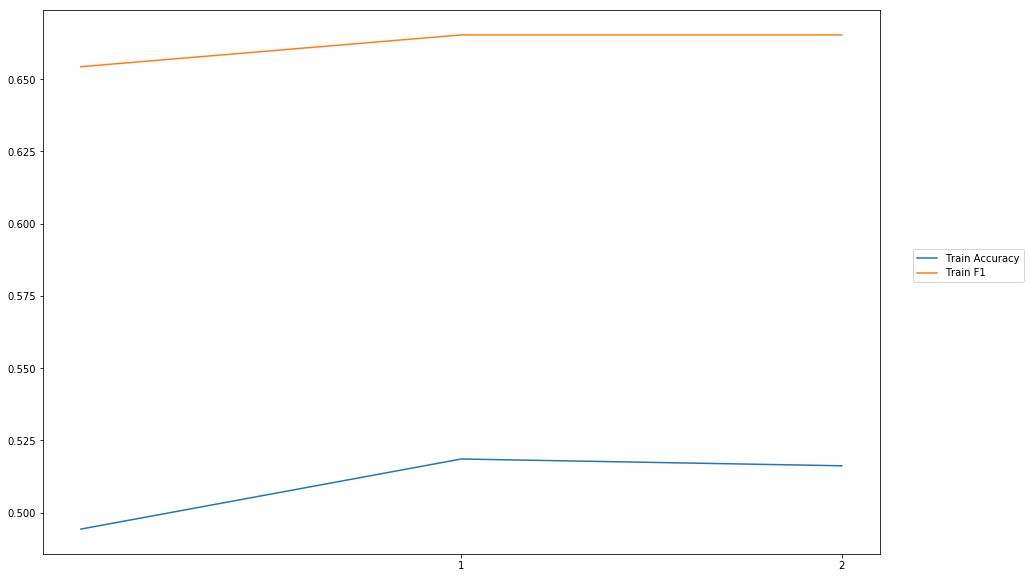


-----Test Scores----
Loss: 0.5000605266921374
Accuracy: 59.31122448979592
Precision: 39.668367341879026
Recall: 99.99999996784565
F1: 56.80364889062391


In [8]:
EPOCHS = 3
BATCH_SIZE = 272
optimizer = Adagrad(lr=0.001)
lossfunction = 'squared_hinge'
softmax = True

train_evaluate_final_model(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'alle_hp_combinded')

### with early stopping

In [9]:
wv_layer_1b = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_1b = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_1b = wv_layer_1b(comment_input_1b)

#First Dense Layer
x_1b = Dense(600, activation='relu')(embedded_sequences_1b)

x_1b = Flatten()(x_1b)

#Output (Dense) Layer
preds_1b = Dense(2, activation='hard_sigmoid')(x_1b)

# build the model
model_1b = Model(inputs=[comment_input_1b], outputs=preds_1b)

Train on 3067 samples, validate on 767 samples
Epoch 1/30
3067/3067 [==============================] - 2s 590us/step - loss: 0.5402 - acc: 0.5429 - precision: 0.5024 - recall: 0.9396 - f1_score: 0.6548 - val_loss: 0.5029 - val_acc: 0.5189 - val_precision: 0.4824 - val_recall: 1.0000 - val_f1_score: 0.6508
Epoch 2/30
3067/3067 [==============================] - 2s 534us/step - loss: 0.5013 - acc: 0.5236 - precision: 0.5024 - recall: 1.0000 - f1_score: 0.6688 - val_loss: 0.5003 - val_acc: 0.5254 - val_precision: 0.4824 - val_recall: 1.0000 - val_f1_score: 0.6508
Epoch 3/30
3067/3067 [==============================] - 2s 524us/step - loss: 0.5003 - acc: 0.5165 - precision: 0.5024 - recall: 1.0000 - f1_score: 0.6688 - val_loss: 0.5001 - val_acc: 0.5280 - val_precision: 0.4824 - val_recall: 1.0000 - val_f1_score: 0.6508
Epoch 4/30
3067/3067 [==============================] - 2s 519us/step - loss: 0.5001 - acc: 0.5109 - precision: 0.5024 - recall: 1.0000 - f1_score: 0.6688 - val_loss: 0.5001

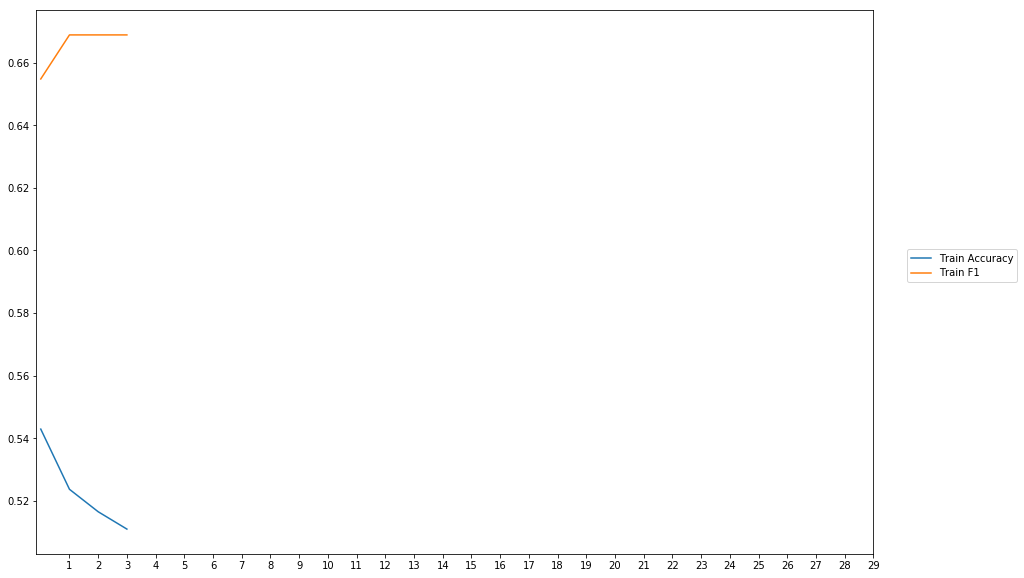


-----Test Scores----
Loss: 0.5000577264902543
Accuracy: 59.056122448979586
Precision: 39.668367341879026
Recall: 99.99999996784565
F1: 56.80364889062391


In [10]:
EPOCHS = 30
BATCH_SIZE = 272
optimizer = Adagrad(lr=0.001)
lossfunction = 'squared_hinge'
softmax = True

train_evaluate_final_model_with_es(model_1b, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'alle_hp_combinded_with_es', 'val_acc', 1)

## Combine only better hyperparameters

In [11]:
wv_layer_2 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_2 = wv_layer_2(comment_input_2)

#First Dense Layer
x_2 = Dense(600, activation='relu')(embedded_sequences_2)

x_2 = Flatten()(x_2)

#Output (Dense) Layer
preds_2 = Dense(2, activation='softmax')(x_2)

# build the model
model_2 = Model(inputs=[comment_input_2], outputs=preds_2)

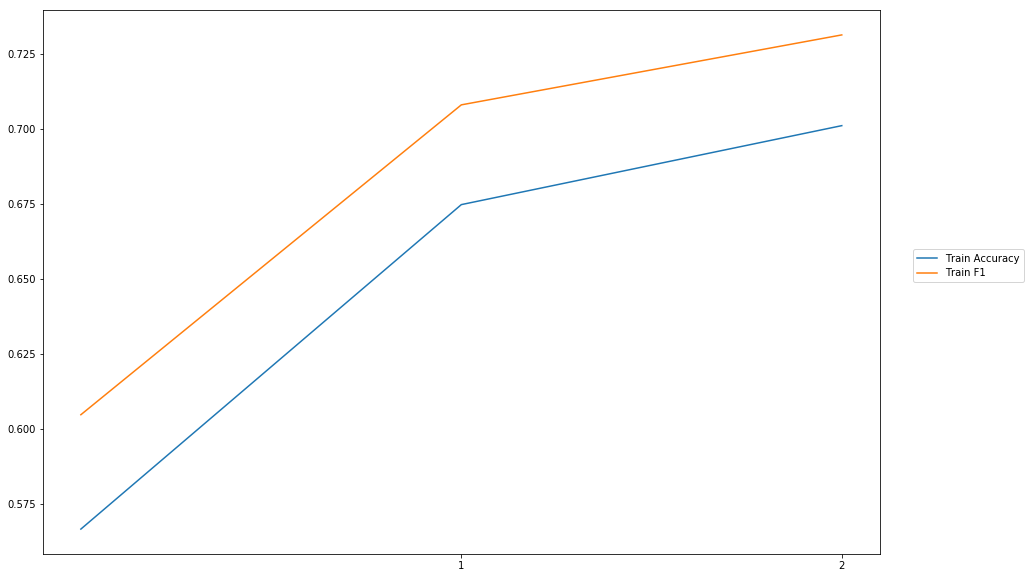


-----Test Scores----
Loss: 0.6405222440252498
Accuracy: 61.73469387755102
Precision: 51.230425044467474
Recall: 73.6334404907931
F1: 60.422158733405205


In [12]:
EPOCHS = 3
BATCH_SIZE = 64
optimizer = Adagrad(lr=0.001)
lossfunction = 'binary_crossentropy'
softmax = True

train_evaluate_final_model(model_2, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'only_better_hp_combinded')

### with early stopping

In [13]:
wv_layer_2b = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_2b = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences_2b = wv_layer_2b(comment_input_2b)

#First Dense Layer
x_2b = Dense(600, activation='relu')(embedded_sequences_2b)

x_2b = Flatten()(x_2b)

#Output (Dense) Layer
preds_2b = Dense(2, activation='softmax')(x_2b)

# build the model
model_2b = Model(inputs=[comment_input_2b], outputs=preds_2b)

Train on 3067 samples, validate on 767 samples
Epoch 1/30
3067/3067 [==============================] - 5s 2ms/step - loss: 0.6769 - acc: 0.5703 - precision: 0.5570 - recall: 0.7067 - f1_score: 0.6230 - val_loss: 0.6759 - val_acc: 0.5737 - val_precision: 0.5458 - val_recall: 0.6919 - val_f1_score: 0.6103
Epoch 2/30
3067/3067 [==============================] - 5s 2ms/step - loss: 0.6275 - acc: 0.6749 - precision: 0.6433 - recall: 0.7923 - f1_score: 0.7101 - val_loss: 0.6743 - val_acc: 0.5711 - val_precision: 0.5380 - val_recall: 0.7838 - val_f1_score: 0.6381


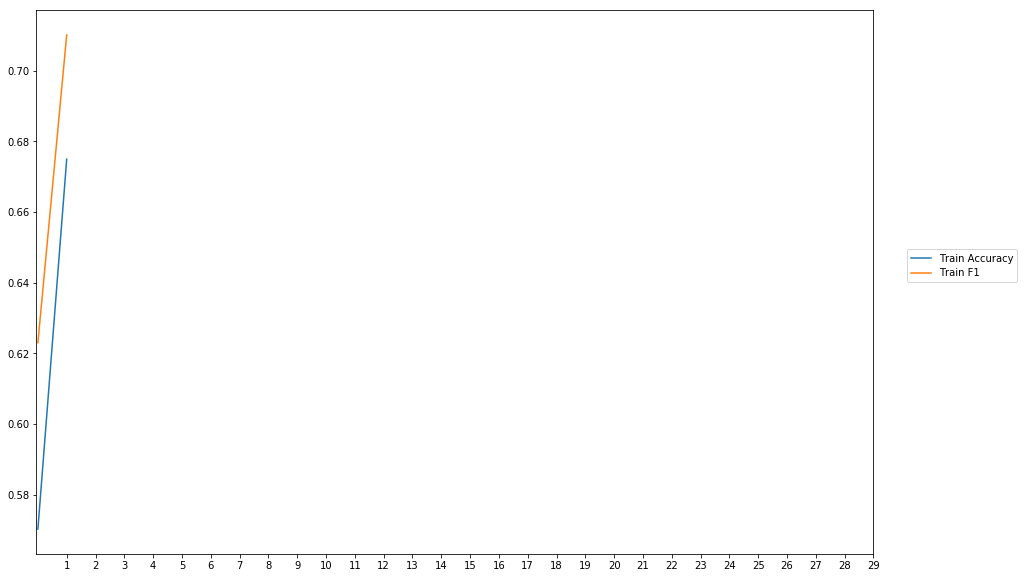


-----Test Scores----
Loss: 0.6627443627435334
Accuracy: 57.6530612244898
Precision: 48.03001875271481
Recall: 82.31511251372504
F1: 60.6635024405621


In [15]:
EPOCHS = 30
BATCH_SIZE = 64
optimizer = Adagrad(lr=0.001)
lossfunction = 'binary_crossentropy'
softmax = True

train_evaluate_final_model_with_es(model_2b, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'only_better_hp_combinded_with_es', 'val_acc', 1)